Is there a more effective way to add a mean row in 9.7? Thanks!

## 9.3 (Class Average: Writing Student Records to a CSV File)  
An instructor teaches a class in which each student takes three exams. The instructor would like to store this information
in a file named grades.csv for later use. Write code that enables an instructor to enter each student’s first name and last name as strings and the student’s three exam grades as integers. Use the csv module to write each record into the grades.csv file. Each
record should be a single line of text in the following CSV format:
> _firstname,lastname,exam1grade,exam2grade,exam3grade_

In [208]:
import csv

loop = 'YES'
grades_dictionary = {}
count = 0

while loop == 'YES':
    if count >= 5:
        print('Too many incorrect names')
        break

    name = input('First and Last Name')

    if len(name.split(' ')) != 2:
        print('Input First AND Last Name')
        count += 0
        continue

    count = 0
    grade1 = int(input('First Test Grade'))
    grade2 = int(input('Second Test Grade'))
    grade3 = int(input('Third Test Grade'))
    grades_dictionary[name] = [grade1, grade2, grade3]

    loop = input('Type "YES" to input another list of three grades. Type anything else to output to csv')

with open('grades.csv', mode='w', newline='') as grades:
    writer = csv.writer(grades)
    writer.writerow(['firstname', 'lastname', 'exam1grade', 'exam2grade', 'exam3grade'])
    for key in grades_dictionary:
        name = key.split(' ')
        write = [i for i in name]
        write.append(grades_dictionary[key][0])
        write.append(grades_dictionary[key][1])
        write.append(grades_dictionary[key][2])
        
        writer.writerow(write)


## 9.4 (Class Average: Reading Student Records from a CSV File)  
Use the csv module to read the grades.csv file from the previous exercise. Display the data in tabular format.

In [209]:
import pandas as pd

grades_dictionary = {}
with open('grades.csv', mode='r', newline='') as grades:
    reader = csv.reader(grades)
    loop = 0
    for record in reader:
        if loop == 0:
            firsth, lasth, grade1h, grade2h, grade3h = record
            loop += 1
            continue

        first, last, grade1, grade2, grade3 = record
        fullname = f'{first} {last}'
        grades_dictionary[fullname] = [grade1, grade2, grade3]
    
grades = pd.DataFrame(grades_dictionary).T
grades.columns = [grade1h, grade2h, grade3h]
grades

,exam1grade,exam2grade,exam3grade
Benjamin Parsons,100,100,100
Benjamin Eviltwin,22,11,0
Hello Kity,48,58,99


## 9.16 (Working with the diamonds.csv Dataset in Pandas)  
In this book’s data-science chapters, you’ll work extensively with datasets, many in CSV format. You’ll frequently use pandas to load datasets and prepare their data for use in machine-learning studies. Datasets are available for almost anything you’d want to study. There are numerous dataset repositories from which you can download datasets in CSV and other formats. In this chapter, we mentioned:  

> https://vincentarelbundock.github.io/Rdatasets/datasets.html  

and

> https://github.com/awesomedata/awesome-public-datasets  

The Kaggle competition site:

> https://www.kaggle.com/datasets?filetype=csv  

has approximately 11,000 datasets with over 7500 in CSV format. The U.S. government’s data.gov site:  

> https://catalog.data.gov/dataset?res_format=CSV&_res_format_limit=0  

has over 300,000 datasets with approximately 19,000 in CSV format.  

In this exercise, you’ll use the diamonds dataset to perform tasks similar to those you saw in the Intro to Data Science section. This dataset is available as diamonds.csv from various sources, including the Kaggle and Rdatasets sites listed above. The dataset contains information on 53,940 diamonds, including each diamond’s carats, cut, color, clarity, depth, table (flat top surface), price and x, y and z measurements. The Kaggle site’s web page for this dataset describes each column’s content.  

Perform the following tasks to study and analyze the diamonds dataset:

### a) Download diamonds.csv from one of the dataset repositories.

Done through URL below

### b) Load the dataset into a pandas DataFrame with the following statement, which uses the first column of each record as the row index:

In [3]:
import pandas as pd

diamonds = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv', index_col=0)

### c) Display the first seven rows of the DataFrame.

In [211]:
diamonds.head(7)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


### d) Display the last seven rows of the DataFrame.

In [212]:
diamonds.tail(7)

,carat,cut,color,clarity,depth,table,price,x,y,z
53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


### e) Use the DataFrame method describe (which looks only at the numerical columns) to calculate the descriptive statistics for the numerical columns—carat, depth, table, price, x, y and z.

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### f) Use Series method describe to calculate the descriptive statistics for the categorical data (text) columns—cut, color and clarity.

In [214]:
diamonds['cut'].describe()

count     53940
unique        5
top       Ideal
freq      21551
Name: cut, dtype: object

In [215]:
diamonds['color'].describe()

count     53940
unique        7
top           G
freq      11292
Name: color, dtype: object

In [216]:
diamonds['clarity'].describe()

count     53940
unique        8
top         SI1
freq      13065
Name: clarity, dtype: object

### g) What are the unique category values (use the Series method unique)?

In [217]:
print('Cut Categories \n--------------')
for i in diamonds['cut'].unique():
    print(i)

Cut Categories 
--------------
Ideal
Premium
Good
Very Good
Fair


In [218]:
print('Color Categories \n----------------')
for i in diamonds['color'].unique():
    print(i)

Color Categories 
----------------
E
I
J
H
F
G
D


In [219]:
print('Clarity Categories \n------------------')
for i in diamonds['clarity'].unique():
    print(i)

Clarity Categories 
------------------
SI2
SI1
VS1
VS2
VVS2
VVS1
I1
IF


### h) Pandas has many built-in graphing capabilities. Execute the %matplotlib magic to enable Matplotlib support in IPython. Then, to view histograms of each numerical data column, call your DataFrame’s hist method. The following figure shows the results for the DataFrame’s seven numerical columns:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda5aab4610>,
      dtype=object)

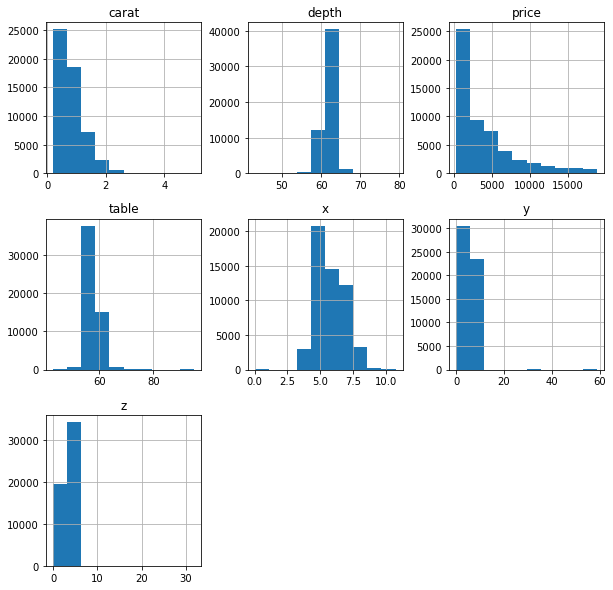

In [14]:
%matplotlib inline

diamonds.hist(figsize = (10,10))

## 9.6 (Class Average: Writing a Gradebook Dictionary to a JSON File)  
Reimplement Exercise 9.3 using the json module to write the student information to the file in JSON format. For this exercise, create a dictionary of student data in the following format:  
```python
gradebook_dict = {'students': [student1dictionary, student2dictionary, ...]}
```  
Each dictionary in the list represents one student and contains the keys 'first_name',
'last_name', 'exam1', 'exam2' and 'exam3', which map to the values representing each
student’s first name (string), last name (string) and three exam scores (integers). Output
the gradebook_dict in JSON format to the file grades.json.

In [221]:
import numpy as np
import json

gradebook_dict = {}
studentlist = []

for i in range(1, 11):
    grades = [round(100* np.random.beta(7,2), 0) for i in range(3)]
    first_name = f'Student_{i}' 
    last_name = f'Piethin_{i}'

    studentdictionary = {'first_name': first_name, 'last_name': last_name, \
                        'exam1': grades[0], 'exam2': grades[1], 'exam3': grades[2]}

    studentlist.append(studentdictionary)

gradebook_dict['students'] = studentlist

with open('grades.json', 'w') as grades:
    json.dump(gradebook_dict, grades)

gradebook_dict

{'students': [{'first_name': 'Student_1',
   'last_name': 'Piethin_1',
   'exam1': 63.0,
   'exam2': 84.0,
   'exam3': 74.0},
  {'first_name': 'Student_2',
   'last_name': 'Piethin_2',
   'exam1': 64.0,
   'exam2': 84.0,
   'exam3': 88.0},
  {'first_name': 'Student_3',
   'last_name': 'Piethin_3',
   'exam1': 74.0,
   'exam2': 81.0,
   'exam3': 73.0},
  {'first_name': 'Student_4',
   'last_name': 'Piethin_4',
   'exam1': 71.0,
   'exam2': 91.0,
   'exam3': 77.0},
  {'first_name': 'Student_5',
   'last_name': 'Piethin_5',
   'exam1': 90.0,
   'exam2': 56.0,
   'exam3': 96.0},
  {'first_name': 'Student_6',
   'last_name': 'Piethin_6',
   'exam1': 93.0,
   'exam2': 79.0,
   'exam3': 94.0},
  {'first_name': 'Student_7',
   'last_name': 'Piethin_7',
   'exam1': 87.0,
   'exam2': 62.0,
   'exam3': 71.0},
  {'first_name': 'Student_8',
   'last_name': 'Piethin_8',
   'exam1': 97.0,
   'exam2': 80.0,
   'exam3': 42.0},
  {'first_name': 'Student_9',
   'last_name': 'Piethin_9',
   'exam1': 86.0,

## 9.7 (Class Average: Reading a Gradebook Dictionary from a JSON File)  
Reimplement Exercise 9.4 using the json module to read the grades.json file created in the previous exercise. Display the data in tabular format, including an additional column showing each student’s average to the right of that student’s three exam grades and an additional row showing the class average on each exam below that exam’s column.

In [222]:
# with open('grades.json', 'r') as grades:
#     grades_json = json.load(grades)

grades_data = pd.read_json('grades.json')
count = 0
data_dict = {}

for i in grades_data['students']:
    data_dict[count] = i
    count += 1

grades_dataframe = pd.DataFrame.from_dict(data_dict, orient='index')
grades_dataframe['average'] = round(grades_dataframe.loc[: , 'exam1':'exam3'].mean(axis=1),1)
grades_dataframe.loc['average'] = [None, None, grades_dataframe['exam1'].mean(), grades_dataframe['exam2'].mean(), \
                                        grades_dataframe['exam3'].mean(), grades_dataframe['average'].mean()]
grades_dataframe

,first_name,last_name,exam1,exam2,exam3,average
0,Student_1,Piethin_1,63.0,84.0,74.0,73.70
1,Student_2,Piethin_2,64.0,84.0,88.0,78.70
2,Student_3,Piethin_3,74.0,81.0,73.0,76.00
3,Student_4,Piethin_4,71.0,91.0,77.0,79.70
4,Student_5,Piethin_5,90.0,56.0,96.0,80.70
5,Student_6,Piethin_6,93.0,79.0,94.0,88.70
6,Student_7,Piethin_7,87.0,62.0,71.0,73.30
7,Student_8,Piethin_8,97.0,80.0,42.0,73.00
8,Student_9,Piethin_9,86.0,80.0,63.0,76.30
9,Student_10,Piethin_10,40.0,88.0,83.0,70.30


## 10.2 (Account Class with Read-Only Properties)  
Modify Section 10.2.2’s Account class to provide read-only properties for the name and balance. Rename the class attributes with single leading underscores. Re-execute Section 10.2.2’s IPython session to test your updated class. To show that name and balance are read-only, try to assign new values to them.

In [60]:
from decimal import Decimal

class Account:
    """Account class for maintaining a bank account balance."""

    def __init__(self, name, balance):
        """Initialize an Account object."""

        # if balance is less than 0.00, raise an exception
        if balance < Decimal('0.00'):
            raise ValueError('Initial balance must be >= to 0.00.')
        
        self._name = name
        self._balance = balance
    
    @property
    def balance(self):
        """Get Balance"""
        return self._balance

    @property
    def name(self):
        """Get Balance"""
        return self._name

    def deposit(self, amount):
        """Deposit money to the account."""

        # if amount is less than 0.00, raise an exception
        if amount < Decimal('0.00'):
            raise ValueError('amount must be positive.')

        self._balance += amount

account_1234 = Account('Benjamin Parsons', 1000020.99)

In [61]:
account_1234.balance

1000020.99

In [62]:
account_1234.deposit(20)

In [63]:
account_1234.balance

1000040.99

In [64]:
account_1234.name

'Benjamin Parsons'

In [65]:
account_1234.balance = 0

AttributeError: can't set attribute

## 10.5 (Duck Typing)  
Recall that with duck typing, objects of unrelated classes can respond to the same method calls if they implement those methods. In Section 10.8, you created a list containing a CommissionEmployee and a SalariedCommissionEmployee. Then, you iterated through it, displaying each employee’s string representation and earnings. Create a class SalariedEmployee for an employee that gets paid a fixed weekly salary. Do not inherit from CommissionEmployee or SalariedCommissionEmployee. In class SalariedEmployee, override method __repr__ and provide an earnings method. Demonstrate duck typing by creating an object of your class, adding it to the list at the end of Section 10.8, then executing the loop to show that it properly processes objects of all three classes.

In [155]:
from commissionemployee import CommissionEmployee
from salariedcommissionemployee import SalariedCommissionEmployee

class WellPaidDuck:
    def __repr__(self):
        return 'I am a well-paid duck'
    def earnings(self):
        return Decimal('1_000_000.00')

class SalariedEmployee:

    def __init__(self, first_name, last_name, ssn, base_salary):
        self._first_name = first_name
        self._last_name = last_name
        self._ssn = ssn
        self.base_salary = Decimal(base_salary)

    def __repr__(self):
        """ Return earnings as default"""
        return f'{self.earnings()}'

    def earnings(self):
        """ Calculate earnings """
        return self.base_salary

b = SalariedEmployee("Benjamin", "Parsons", "1234567890", "1_000_000.00")

c = CommissionEmployee('Sue', 'Jones', '333-33-3333',
                        Decimal('10000.00'), Decimal('0.06'))

s = SalariedCommissionEmployee('Bob', 'Lewis', '444-44-4444',
                                Decimal('5000.00'), Decimal('0.04'), Decimal('300.00'))

d = WellPaidDuck()

employees = [c, s, d, b]

for employee in employees:
    print(employee)
    print(f'{employee.earnings():,.2f}\n')

CommissionEmployee: Sue Jones
social security number: 333-33-3333
gross sales: 10000.00
commission rate: 0.06
600.00

SalariedCommissionEmployee: Bob Lewis
social security number: 444-44-4444
gross sales: 5000.00
commission rate: 0.04
base salary: 300.00
500.00

I am a well-paid duck
1,000,000.00

1000000.00
1,000,000.00

